In [65]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


In [67]:
print('Label count in y:', np.bincount(y))
print('Label count in y_test:', np.bincount(y_test))
print('Label count in y_train:', np.bincount(y_train))


Label count in y: [50 50 50]
Label count in y_test: [15 15 15]
Label count in y_train: [35 35 35]


In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
# 平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [69]:
from sklearn.linear_model import Perceptron
# エポック数40 学習率0.1 のインスタンス生成
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [70]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 1


In [71]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9777777777777777


In [72]:

print('Accuracy:', ppn.score(X_test_std, y_test))

Accuracy: 0.9777777777777777


In [73]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # 各特徴量を1次元にする
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果をグリッドポイントに変換
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # クラスごとにデータをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

/var/folders/3b/9kcs_5ds60bfy0ph_ky0jnb00000gn/T/ipykernel_69003/1378139205.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


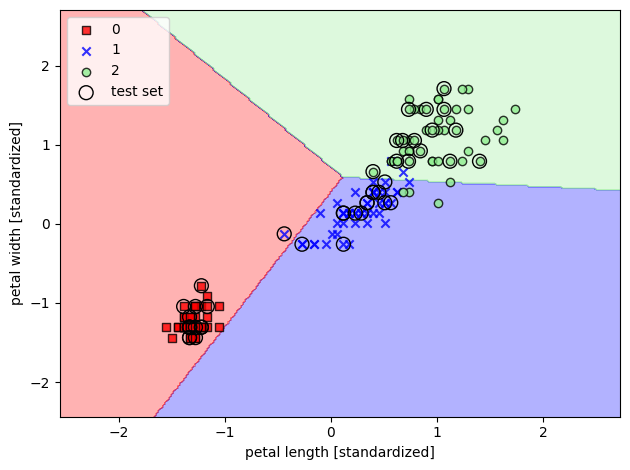

In [74]:
# 訓練データとテストデータの特徴量を縦に結合
import numpy as np
import matplotlib.pyplot as plt
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

#決定境界のプロット
plot_decision_regions(X=X_combined_std,y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
/var/folders/3b/9kcs_5ds60bfy0ph_ky0jnb00000gn/T/ipykernel_69003/315149306.py:11: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\phi (z)$')


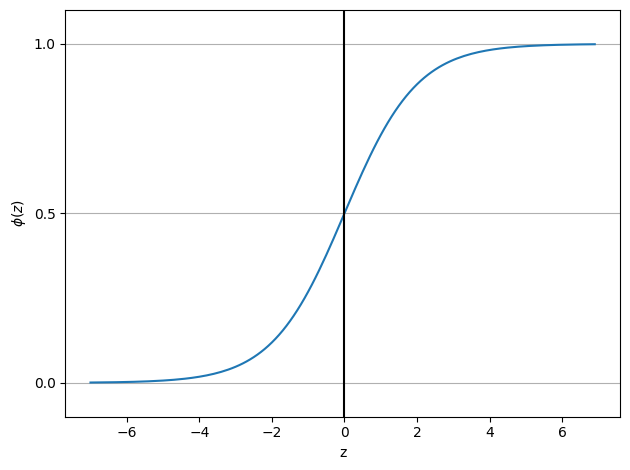

In [75]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('images/03_02.png', dpi=300)
plt.show()

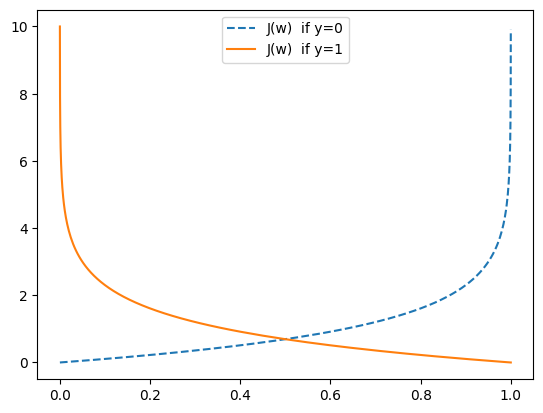

In [76]:
import matplotlib.pyplot as plt
def cost_1(z):
    return - np.log(sigmoid(z))

def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
# y=1のコストを計算する関数を実行
c1 = [cost_1(x) for x in z]
c0 = [cost_0(x) for x in z]
#結果をプロット
plt.plot(phi_z, c0, linestyle='--', label='J(w)  if y=0')
plt.plot(phi_z, c1, linestyle='-', label='J(w)  if y=1')
plt.legend(loc='best')




In [77]:
class LogisticRegressionGD(object):
    """勾配効果法に基づくロジスティック回帰分類器
    
    パラメータ
    -----------
    eta : float
        学習率
    n_iter : int
        訓練データの訓練回数

    random_state : int (default: None)
        ランダムシード値
    
    属性
    ----------
    w_ : 1次元配列
        適合後の重み
    cost_ : リスト
        各エポックでのロジスティックコスト関数

    """
    def __init__(self, eta=0.01, n_iter=10, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """
        訓練データに適合させる
        
        パラメータ
        ----------
        X : { 配列のような構造} shape = {n_examples, n_features}
        訓練データ
        y : 配列みたいな構造, shape = {n_examples}

        戻り値
        ----------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        # 訓練回数分の処理
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            # ロジスティクの計算
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            # エポックごとのコストを格納
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """線形活性化関数の出力"""
        return 1. / (1. + np.exp(-np.clip(X, -250, 250)))

    def predict(self, X):
        """1ステップ後のクラスラベル"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

/var/folders/3b/9kcs_5ds60bfy0ph_ky0jnb00000gn/T/ipykernel_69003/1378139205.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


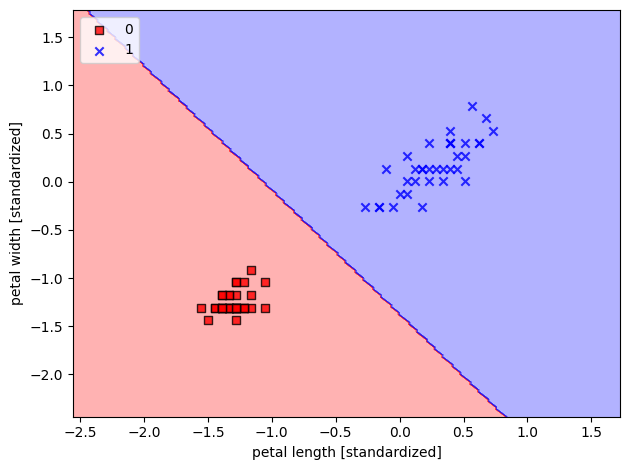

In [78]:
import matplotlib.pyplot as plt
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
# ロジスティック回帰のインスタンス作成
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
# モデルを訓練データに適合
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X_train_01_subset, y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

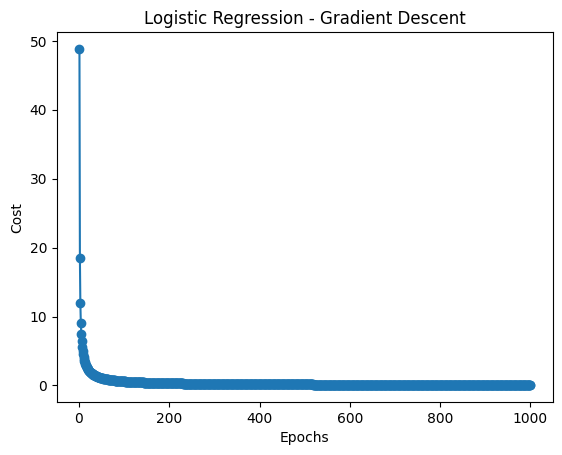

In [79]:
# コスト関数のプロット
plt.plot(range(1, lrgd.n_iter + 1), lrgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Logistic Regression - Gradient Descent')
plt.show()

/var/folders/3b/9kcs_5ds60bfy0ph_ky0jnb00000gn/T/ipykernel_69003/1378139205.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


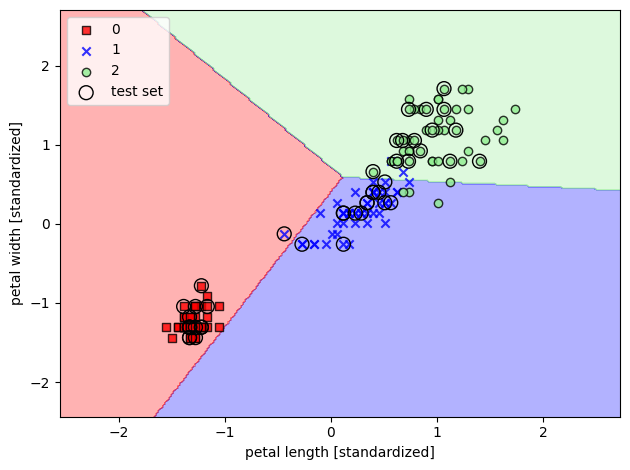

In [80]:
# 訓練データとテストデータの特徴量を縦に結合
import numpy as np
import matplotlib.pyplot as plt
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

#決定境界のプロット
plot_decision_regions(X=X_combined_std,y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


/var/folders/3b/9kcs_5ds60bfy0ph_ky0jnb00000gn/T/ipykernel_69003/1378139205.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


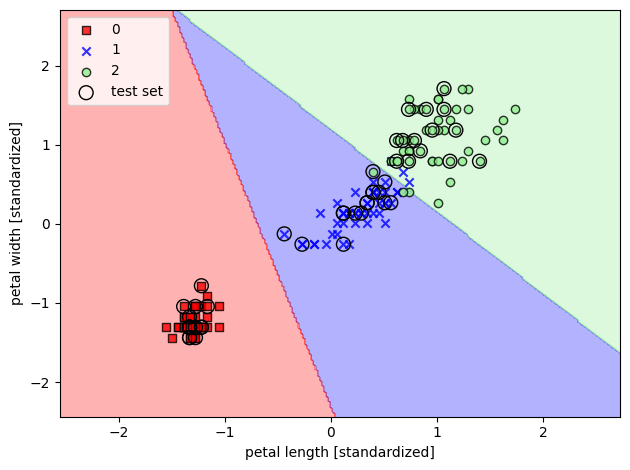

In [81]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
#訓練データをフィット
lr.fit(X_train_std, y_train)
# 決定境界をプロット
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [82]:
lr.predict_proba(X_test_std[:3,:])

array([[6.63770505e-09, 1.44747233e-01, 8.55252760e-01],
       [8.34031210e-01, 1.65968790e-01, 3.20815954e-13],
       [8.48822884e-01, 1.51177116e-01, 2.57998350e-14]])

In [83]:
lr.predict_proba(X_test_std[:3, :]).max(axis=1)

array([0.85525276, 0.83403121, 0.84882288])

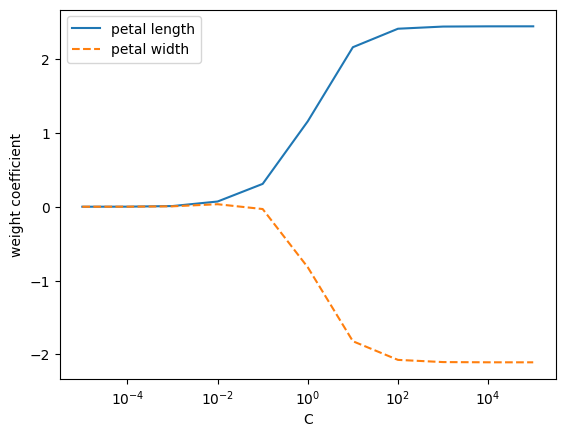

In [84]:
import numpy as np
from sklearn.linear_model import LogisticRegression
weights, params = [], []
# 10個の逆正則化パラメータに対応するロジスティック回帰モデルをそれぞれ処理
for c in np.arange(-5, 6):
    lr = LogisticRegression(C=10.**c, random_state=1, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

# 重み係数をNumpy配列に変換
weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
#plt.savefig('images/03_08.png', dpi=300)
plt.show()

/var/folders/3b/9kcs_5ds60bfy0ph_ky0jnb00000gn/T/ipykernel_69003/1378139205.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


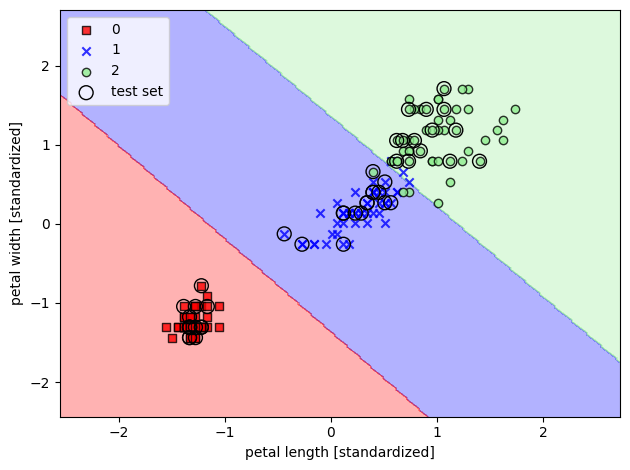

In [85]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 3.5.1 線形分離不可能なデータに対するカーネル法  

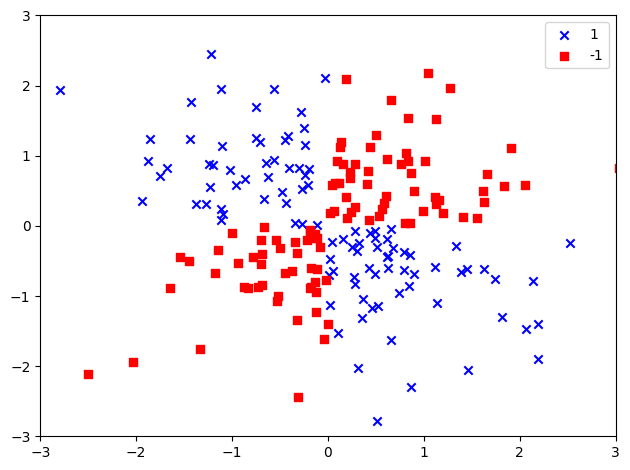

In [86]:
import matplotlib.pyplot as plt

np.random.seed(1)
# 標準正規分布に従う乱数で200行２列の行列を生成
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
# ラベル1を青のxでプロット
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
# ラベル-1を赤の四角でプロット
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
#軸の範囲設定
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/3b/9kcs_5ds60bfy0ph_ky0jnb00000gn/T/ipykernel_69003/1378139205.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


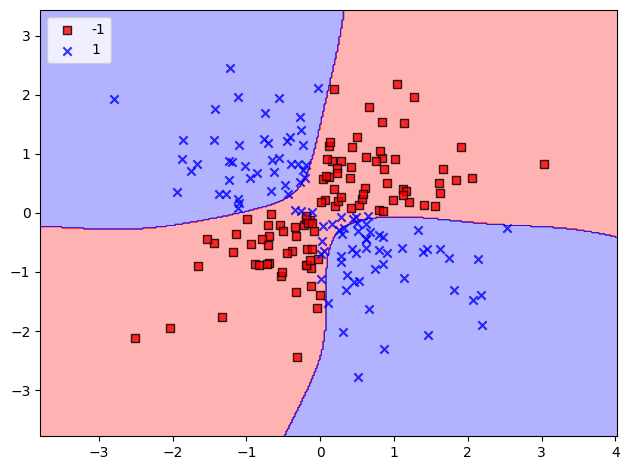

In [87]:
# RBF カーネルによるインスタンス
from sklearn.svm import SVC
import matplotlib.pyplot as plt
svm = SVC(kernel='rbf', random_state=1, gamma='auto', C=1)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/3b/9kcs_5ds60bfy0ph_ky0jnb00000gn/T/ipykernel_69003/1378139205.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


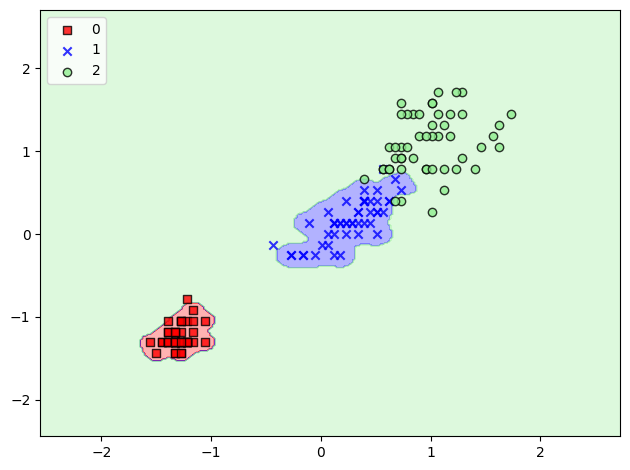

In [88]:
svm = SVC(kernel='rbf', random_state=1, gamma=100, C=1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [89]:
# ジニ不純度の関数を定義
import numpy as np
def gini(p):
    return (p)*(1 - (p)) + (1 -p)*(1 - (1 - p))

def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2(1 - p)

def error(p):
    return 1 - np.max([p, 1 - p])


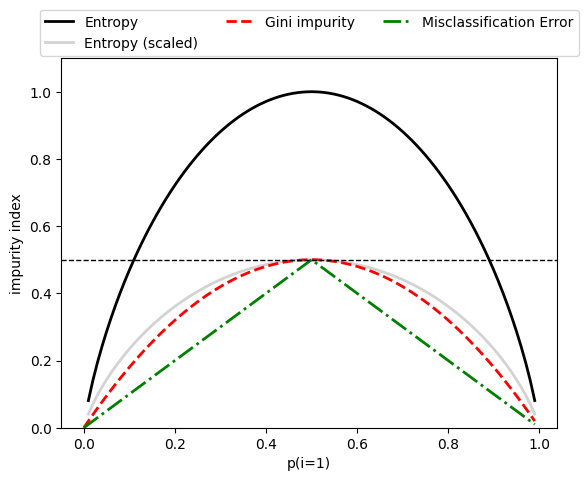

In [90]:
x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
error = [error(i) for i in x]
#図の作成を開始
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls,c, in zip(
    [ent, sc_ent,gini(x), error],
    ["Entropy", "Entropy (scaled)","Gini impurity", "Misclassification Error"],
    ["-", "-", "--", "-."],
    ["black", "lightgray", "red", 'green', 'syan'],
):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()


/var/folders/3b/9kcs_5ds60bfy0ph_ky0jnb00000gn/T/ipykernel_69003/1378139205.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


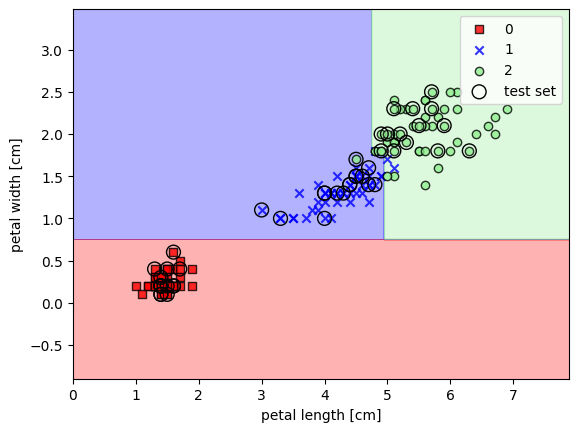

In [91]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
# ジニ不純度を指標とする決定木インスタンス
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree_model, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend()
plt.show()

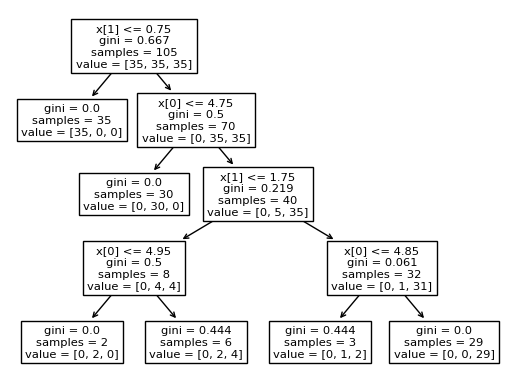

In [92]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show() 

In [93]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_model, filled=True, rounded=True,
                           class_names = ['setosa', 'versicolor', 'virginica'],
                           feature_names=['petal length', 'petal width'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

/var/folders/3b/9kcs_5ds60bfy0ph_ky0jnb00000gn/T/ipykernel_69003/1378139205.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


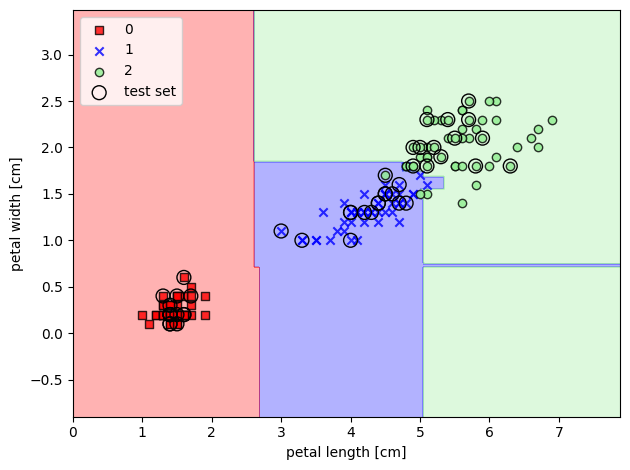

In [94]:
from sklearn.ensemble import RandomForestClassifier
forest =RandomForestClassifier(criterion='gini', n_estimators=20, random_state=1, n_jobs=1)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/3b/9kcs_5ds60bfy0ph_ky0jnb00000gn/T/ipykernel_69003/1378139205.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


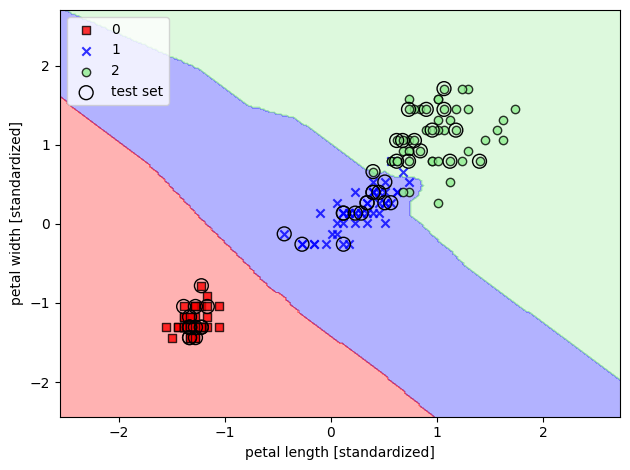

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_24.png', dpi=300)
plt.show()


/var/folders/3b/9kcs_5ds60bfy0ph_ky0jnb00000gn/T/ipykernel_69003/1378139205.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


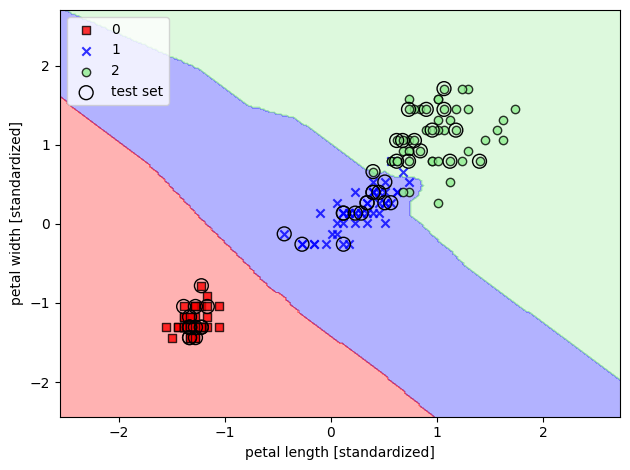

In [96]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()